# MACD Crossover Algorithmic Trading Stategies
In this project we attempt to simulate MACD Crossover Algorithmic Trading Stategies.

In [1]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 44.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [3]:
# import libraries
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12.5, 8.5)

In [16]:
# input all nencessary information
symbol = input("Enter symbol: ")
start = input("Enter Start date: ") # format: yyyy-mm-dd
end = input("Enter End date: ") # format: yyyy-mm-dd

# define portfolio balance
start_balance = int(input("Enter Starting Portfolio Balance: $"))

# calculate exponential moving averages
# short term moving average
short_period = int(input("Input the short exponential moving average period: "))
# long term moving average
long_period = int(input("Input the long exponential moving average period: "))

# macd period
macd_period = int(input("Enter the MACD period: "))

Enter symbol: aapl
Enter Start date: 2018-01-01
Enter End date: 2023-02-16
Enter Starting Portfolio Balance: $1000
Input the short exponential moving average period: 12
Input the long exponential moving average period: 26
Enter the MACD period: 9


In [17]:
# download data
ticker = yf.download(symbol, start=start, end=end)

# create dataframe & store all data in data frame
data = pd.DataFrame()
data[f"{symbol} Adj Close"] = ticker["Adj Close"]

# calculate daily return
data["Return"] = data[f"{symbol} Adj Close"] / data[f"{symbol} Adj Close"].shift(1)
data["Return"].iat[0] = 1
data["Holding Return"] = start_balance * data["Return"].cumprod()

# calculate drawdown
data["Holding Peak Balance"] = data["Holding Return"].cummax()
data["Holding Drawdown"] = data["Holding Return"] - data["Holding Peak Balance"]

# calculate MACD
ema_short = data[f"{symbol} Adj Close"].ewm(span=short_period, adjust=False).mean()
ema_long = data[f"{symbol} Adj Close"].ewm(span=long_period, adjust=False).mean()

macd = ema_short - ema_long
signal = macd.ewm(span=macd_period, adjust=False).mean()

# add columns for entries based on MACD signals
data["Buy"] = macd > signal

# calculate strategy return and balance
data["Strategy Return"] = np.where(data["Buy"]==True, data["Return"], 1)
data["Strategy Balance"] = start_balance * data["Strategy Return"].cumprod()

# calculate strategy drawdown
data["Strategy Peak Balance"] = data["Strategy Balance"].cummax()
data["Strategy Drawdown"] = data["Strategy Balance"] - data["Strategy Peak Balance"]

# calculate metrics
holding_return = round(((data["Holding Return"][-1] / data["Holding Return"][0]) - 1) * 100, 2)
holding_dd = round(((data["Holding Drawdown"] / data["Holding Peak Balance"]).min() * 100), 2)
strategy_return = round(((data['Strategy Balance'][-1] / data['Strategy Balance'][0]) - 1) * 100, 2)
strategy_dd = round(((data['Strategy Balance'][-1] / data['Strategy Balance'][0]) - 1) * 100, 2)

data

[*********************100%***********************]  1 of 1 completed


,aapl Adj Close,Return,Holding Return,Holding Peak Balance,Holding Drawdown,Buy,Strategy Return,Strategy Balance,Strategy Peak Balance,Strategy Drawdown
Date,,,,,,,,,,
2018-01-02,40.888062,1.000000,1000.000000,1000.000000,0.000000,False,1.000000,1000.000000,1000.000000,0.000000
2018-01-03,40.880951,0.999826,999.826096,1000.000000,-0.173904,False,1.000000,1000.000000,1000.000000,0.000000
2018-01-04,41.070835,1.004645,1004.470097,1004.470097,0.000000,True,1.004645,1004.644808,1004.644808,0.000000
2018-01-05,41.538441,1.011385,1015.906334,1015.906334,0.000000,True,1.011385,1016.083035,1016.083035,0.000000
2018-01-08,41.384163,0.996286,1012.133160,1015.906334,-3.773175,True,0.996286,1012.309204,1016.083035,-3.773831
...,...,...,...,...,...,...,...,...,...,...
2023-02-09,150.639999,0.993088,3684.204968,4418.988372,-734.783404,True,0.993088,12200.075781,12505.744287,-305.668507
2023-02-10,151.009995,1.002456,3693.253945,4418.988372,-725.734427,True,1.002456,12230.041052,12505.744287,-275.703235
2023-02-13,153.850006,1.018807,3762.712155,4418.988372,-656.276216,True,1.018807,12460.048732,12505.744287,-45.695556


In [18]:
# output metrics

print(f"--------------{symbol} Metrics----------------")
print(f"Holding Total Return: {holding_return}%")
print(f"Holding Drawdown: {holding_dd}%")
print("")
print(f"Strategy Total Return: {strategy_return}%")
print(f"Strategy Drawdown: {strategy_dd}%")

--------------aapl Metrics----------------
Holding Total Return: 279.89%
Holding Drawdown: -38.52%

Strategy Total Return: 1157.99%
Strategy Drawdown: 1157.99%


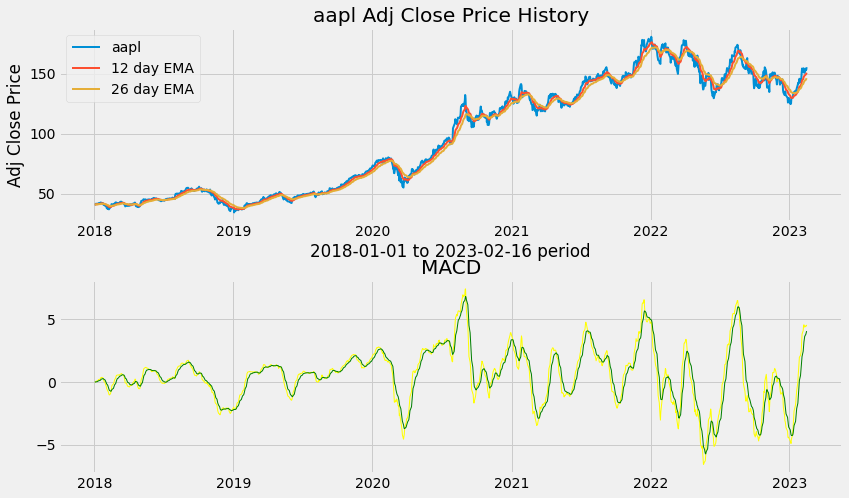

In [19]:
# plot
ax1 = plt.subplot2grid((10,1), (0,0), rowspan=4, colspan=1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan=4, colspan=1)

ax1.plot(ticker["Adj Close"], linewidth=2, label=f"{symbol}")
ax1.plot(ema_short, linewidth=2, label=f"{short_period} day EMA")
ax1.plot(ema_long, linewidth=2, label=f"{long_period} day EMA")
ax1.set_xlabel(f"{start} to {end} period")
ax1.set_ylabel("Adj Close Price")
ax1.legend(loc="upper left")
ax1.set_title(f"{symbol} Adj Close Price History")

ax2.plot(macd, color="yellow", linewidth=1)
ax2.plot(signal, color="green", linewidth=1)
ax2.set_title("MACD")

plt.show()

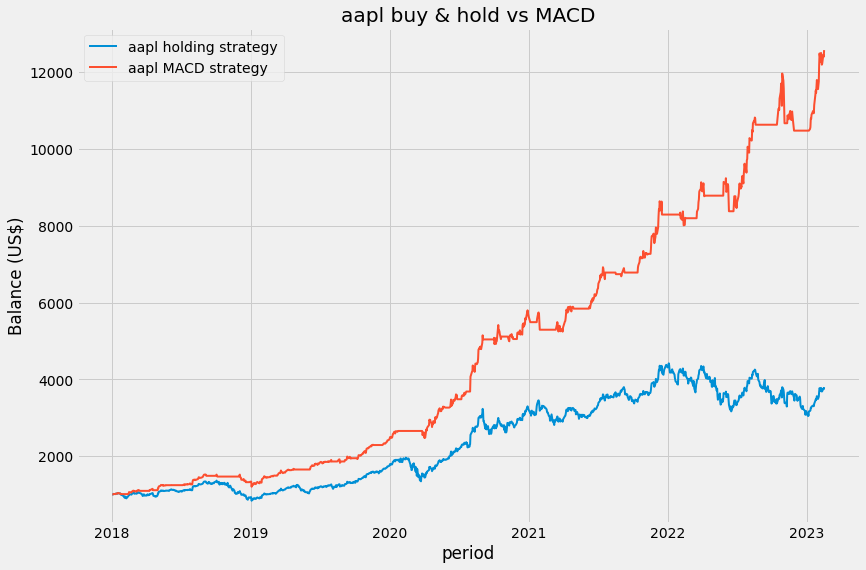

In [20]:
# plot results
plt.plot(data["Holding Return"], linewidth=2, label=f"{symbol} holding strategy")
plt.plot(data["Strategy Balance"], linewidth=2, label=f"{symbol} MACD strategy")
plt.title(f"{symbol} buy & hold vs MACD")
plt.xlabel("period")
plt.ylabel("Balance (US$)")
plt.legend(loc="upper left")
plt.show()